## Importing necessary packages

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import seaborn as sns
from sklearn import metrics
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

## Importing the data from a csv file as a pandas dataframe

In [2]:
data = pd.read_csv("LoanStats.csv")

# Preliminary cleaning and analysing the data

In [3]:
# Checking the first five rows
data.head()

int_rate  loan_amnt  term grade home_ownership  annual_inc         purpose
0     10.65       5000    36     B           RENT     24000.0     credit_card
1     15.27       2500    60     C           RENT     30000.0             car
2     15.96       2400    36     C           RENT     12252.0  small_business
3     13.49      10000    36     C           RENT     49200.0           other
4     12.69       3000    60     B           RENT     80000.0           other

In [4]:
# checking the shape of the data
data.shape

(39786, 7)

In [5]:
# General overview of the data and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39786 entries, 0 to 39785
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   int_rate        39786 non-null  float64
 1   loan_amnt       39786 non-null  int64  
 2   term            39786 non-null  int64  
 3   grade           39786 non-null  object 
 4   home_ownership  39786 non-null  object 
 5   annual_inc      39786 non-null  float64
 6   purpose         39786 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 2.1+ MB


#### Since the numeric values are in the int and float data type, we do not need change any datatypes

In [6]:
# Statistical analysis of numeric data
data.describe()

int_rate     loan_amnt          term    annual_inc
count  39786.000000  39786.000000  39786.000000  3.978600e+04
mean      12.027873  11231.360277     42.448499  6.897907e+04
std        3.727466   7464.542832     10.638782  6.376263e+04
min        5.420000    500.000000     36.000000  4.000000e+03
25%        9.250000   5500.000000     36.000000  4.050000e+04
50%       11.860000  10000.000000     36.000000  5.900000e+04
75%       14.590000  15000.000000     60.000000  8.234250e+04
max       24.590000  35000.000000     60.000000  6.000000e+06

# Data Understanding

## Exploring missing values

In [7]:
data.isnull().sum()

int_rate          0
loan_amnt         0
term              0
grade             0
home_ownership    0
annual_inc        0
purpose           0
dtype: int64

## Exploring duplicate values

In [8]:
duplicates = data.duplicated()
print(data[duplicates])

       int_rate  loan_amnt  term grade home_ownership  annual_inc  \
924        9.91      10000    36     B           RENT     50000.0   
1142      13.49       6000    36     C       MORTGAGE     50000.0   
1236       6.03      10000    36     A       MORTGAGE     80000.0   
1286      13.49      12000    36     C       MORTGAGE     40000.0   
1677      13.49      12000    60     C           RENT     50000.0   
...         ...        ...   ...   ...            ...         ...   
37702      9.32      10000    36     A           RENT     42000.0   
37848      9.63      10000    36     A       MORTGAGE     60000.0   
37885     14.11      10000    36     D           RENT     45000.0   
38052     14.11      10000    36     D           RENT     60000.0   
38322     11.14       8000    36     B           RENT     60000.0   

                  purpose  
924           credit_card  
1142   debt_consolidation  
1236   debt_consolidation  
1286   debt_consolidation  
1677   debt_consolidation  
...

## Exploring the target variable - Interest

In [9]:
# Checking the most common interst rate
int_rate = data.int_rate.value_counts()
int_rate

10.99    958
13.49    831
11.49    826
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: int_rate, Length: 371, dtype: int64

<AxesSubplot:xlabel='int_rate', ylabel='Count'>

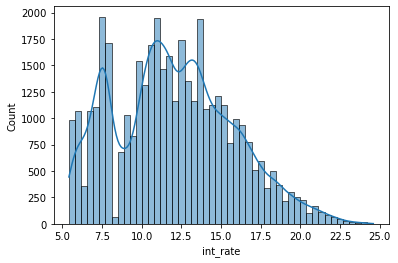

In [10]:
# Ploting the interest rates
sns.histplot(data=data,x="int_rate",kde=True,bins=50)

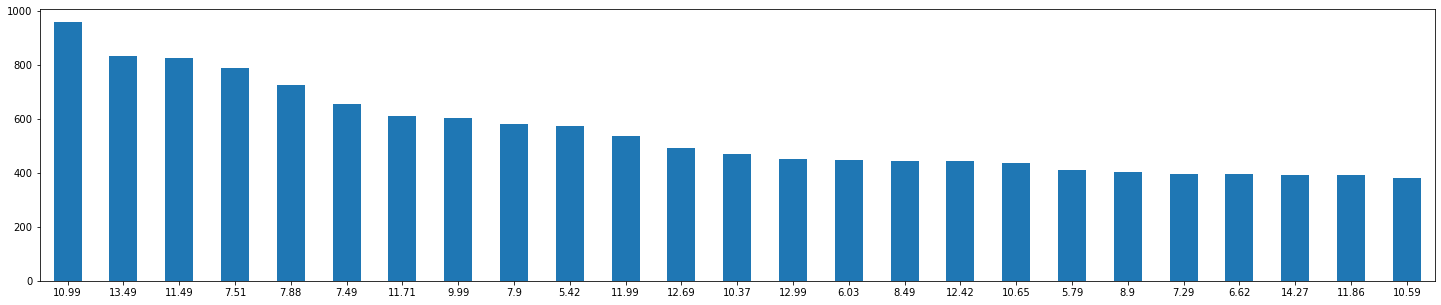

In [11]:
# Checking the top 25 most common interest rate
top_25_int = int_rate.head(25)
top_25_int
ax = top_25_int.plot.bar(rot=0,figsize=(25,5))

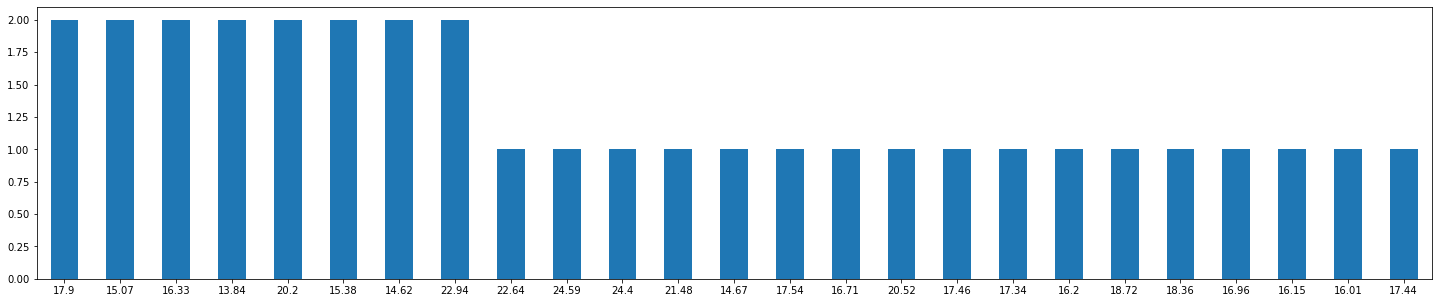

In [12]:
# Checking the 25 least common interest rate
last_25_int = int_rate.tail(25)
last_25_int
ax = last_25_int.plot.bar(rot=0,figsize=(25,5))

###  Exploring the other variables

#### Loan Amount

In [13]:
# Checking the most common interst rate
loans = data.loan_amnt.value_counts()
loans

10000    2835
12000    2340
5000     2051
6000     1908
15000    1898
         ... 
19550       1
22875       1
8175        1
19475       1
22550       1
Name: loan_amnt, Length: 885, dtype: int64

In [14]:
len(loans)

885

#### Loan Term

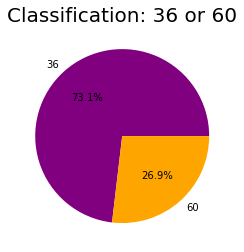

In [15]:
# Checking the most common interst rate
pie_data = data['term'].value_counts()
plt.pie(pie_data, labels=['36', '60'], colors=['purple', 'orange'], autopct="%.1f%%")
plt.title('Classification: 36 or 60', fontsize=20)
plt.show()

#### Grade

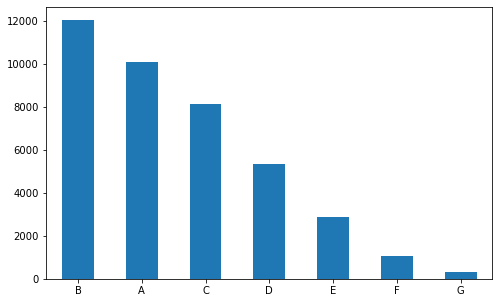

In [16]:
grade = data.grade.value_counts()
ax = grade.plot.bar(rot=0,figsize=(8,5))

#### Home Ownership

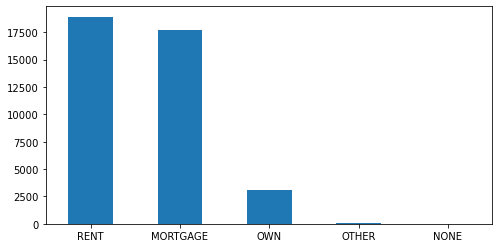

In [17]:
ownership = data.home_ownership.value_counts()
ax = ownership.plot.bar(rot=0,figsize=(8,4))

#### Annual Income

In [18]:
# Checking the most common interst rate
income = data.annual_inc.value_counts()
income

60000.0    1507
50000.0    1060
40000.0     876
45000.0     834
30000.0     825
           ... 
90888.0       1
56820.0       1
45314.0       1
53913.0       1
27376.0       1
Name: annual_inc, Length: 5323, dtype: int64

In [19]:
len(income)

5323

#### Purpose

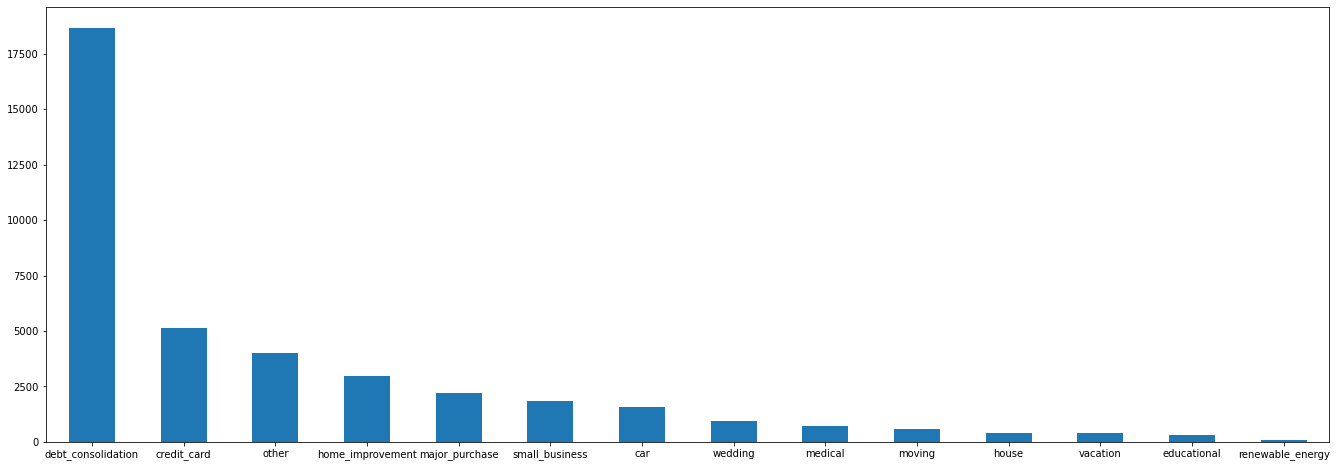

In [20]:
purpose = data.purpose.value_counts()
ax = purpose.plot.bar(rot=0,figsize=(23,8))

#### Correaltion between variables

Text(0.5, 1.0, 'Heatmap for the Data')

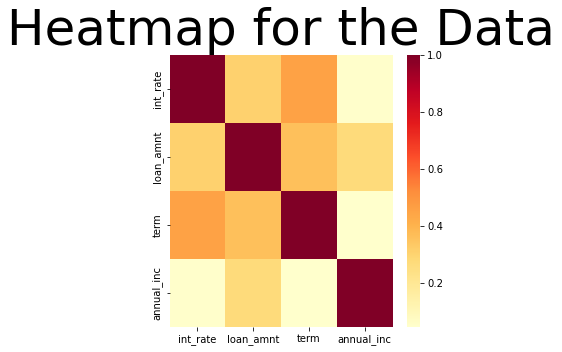

In [21]:
# exploring correlation
# Heatmap for correlation
plt.rcParams['figure.figsize'] = (5,5)
sns.heatmap(data.corr(),cmap="YlOrRd")
plt.title('Heatmap for the Data', fontsize = 50)

# Data Preparation

### Dropping duplicates

In [22]:
data.drop_duplicates(inplace=True)
len(data)

39540

### Converting grade into a numeric variable

In [23]:
data = data.sort_values(by=['grade'], ascending=True)

In [24]:
non_numeric_features = ['grade','home_ownership','purpose']

In [25]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for feature in non_numeric_features:
    data[feature] = le.fit_transform(data[feature])

In [26]:
data

int_rate  loan_amnt  term  grade  home_ownership  annual_inc  purpose
19897      7.29       8000    36      0               4   552000.00        1
26219      7.88       8000    36      0               0    30000.00        1
26218      7.14       5000    36      0               0   110000.00        2
26217      7.51      10000    36      0               4    30000.00        4
26216      7.88       8000    36      0               0    72000.00        2
...         ...        ...   ...    ...             ...         ...      ...
22992     20.40      20000    60      6               0    77004.00        2
9282      22.11       4800    60      6               4    65000.00       11
3014      23.52      35000    60      6               4   108600.00        2
29419     21.27       5000    60      6               4    59355.96        3
2599      22.74      15000    60      6               0    70000.00        2

[39540 rows x 7 columns]

Text(0.5, 1.0, 'Heatmap for the Data')

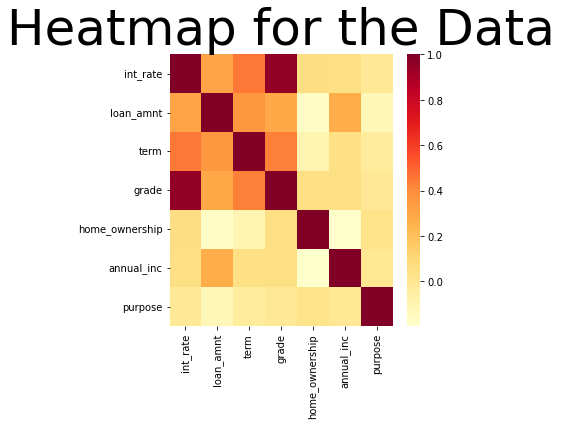

In [27]:
# exploring correlation
# Heatmap for correlation
plt.rcParams['figure.figsize'] = (5,5)
sns.heatmap(data.corr(),cmap="YlOrRd")
plt.title('Heatmap for the Data', fontsize = 50)

C:\Users\public\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


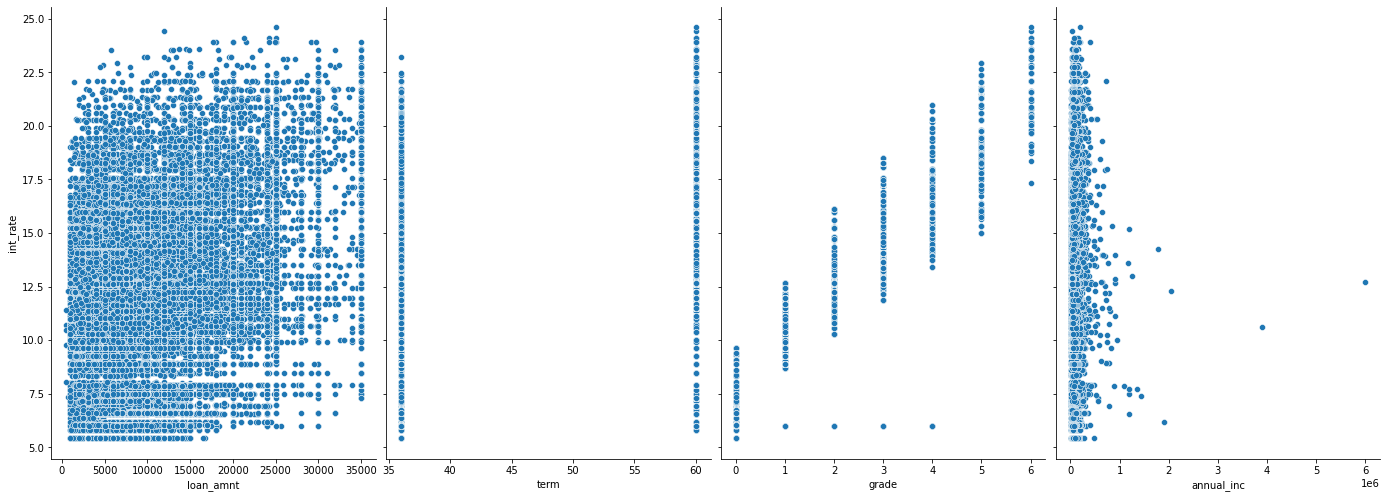

In [28]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['loan_amnt','term','grade','annual_inc'], y_vars='int_rate', size=7, aspect=0.7)

### Transforming categorical variables

In [29]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
cat_features = ['home_ownership','purpose']
encoded_features=[]
for feature in cat_features:
    encoded_feat = enc.fit_transform(data[feature].values.reshape(-1,1)).toarray()
    n = data[feature].nunique()
    cols = ['{}_{}'.format(feature,n) for n in range (1,n+1)]
    enc_df = pd.DataFrame(encoded_feat,columns=cols)
    enc_df.index = data.index
    encoded_features.append(enc_df)
    
data = pd.concat([data, *encoded_features],axis = 1)


In [30]:
data

int_rate  loan_amnt  term  grade  home_ownership  annual_inc  purpose  \
19897      7.29       8000    36      0               4   552000.00        1   
26219      7.88       8000    36      0               0    30000.00        1   
26218      7.14       5000    36      0               0   110000.00        2   
26217      7.51      10000    36      0               4    30000.00        4   
26216      7.88       8000    36      0               0    72000.00        2   
...         ...        ...   ...    ...             ...         ...      ...   
22992     20.40      20000    60      6               0    77004.00        2   
9282      22.11       4800    60      6               4    65000.00       11   
3014      23.52      35000    60      6               4   108600.00        2   
29419     21.27       5000    60      6               4    59355.96        3   
2599      22.74      15000    60      6               0    70000.00        2   

       home_ownership_1  home_ownership_2  home_ownership_3  ...  purpose_5  \
19897               0.0               0.0               0.0  ...        0.0   
26219               1.0               0.0               0.0  ...        0.0   
26218               1.0               0.0               0.0  ...        0.0   
26217               0.0               0.0               0.0  ...        1.0   
26216               1.0               0.0               0.0  ...        0.0   
...                 ...               ...               ...  ...        ...   
22992               1.0               0.0               0.0  ...        0.0   
9282                0.0               0.0               0.0  ...        0.0   
3014                0.0               0.0               0.0  ...        0.0   
29419               0.0               0.0               0.0  ...        0.0   
2599                1.0               0.0               0.0  ...        0.0   

       purpose_6  purpose_7  purpose_8  purpose_9  purpose_10  purpose_11  \
19897        0.0        0.0        0.0        0.0         0.0         0.0   
26219        0.0        0.0        0.0        0.0         0.0         0.0   
26218        0.0        0.0        0.0        0.0         0.0         0.0   
26217        0.0        0.0        0.0        0.0         0.0         0.0   
26216        0.0        0.0        0.0        0.0         0.0         0.0   
...          ...        ...        ...        ...         ...         ...   
22992        0.0        0.0        0.0        0.0         0.0         0.0   
9282         0.0        0.0        0.0        0.0         0.0         0.0   
3014         0.0        0.0        0.0        0.0         0.0         0.0   
29419        0.0        0.0        0.0        0.0         0.0         0.0   
2599         0.0        0.0        0.0        0.0         0.0         0.0   

       purpose_12  purpose_13  purpose_14  
19897         0.0         0.0         0.0  
26219         0.0         0.0         0.0  
26218         0.0         0.0         0.0  
26217         0.0         0.0         0.0  
26216         0.0         0.0         0.0  
...           ...         ...         ...  
22992         0.0         0.0         0.0  
9282          1.0         0.0         0.0  
3014          0.0         0.0         0.0  
29419         0.0         0.0         0.0  
2599          0.0         0.0         0.0  

[39540 rows x 26 columns]

Text(0.5, 1.0, 'Heatmap for the Data')

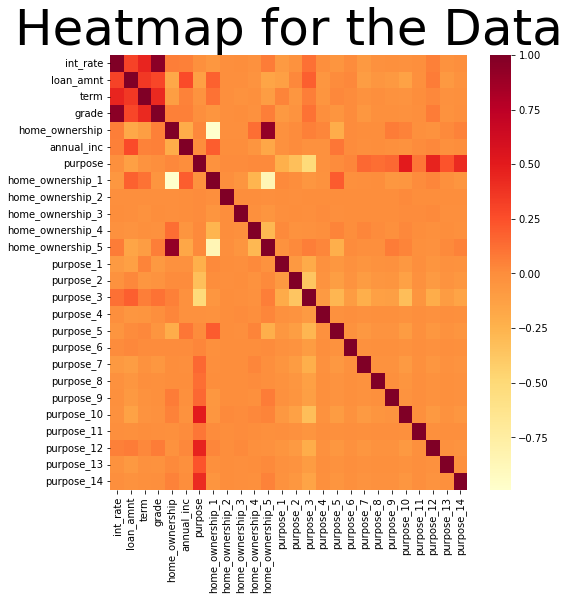

In [31]:
# exploring correlation
# Heatmap for correlation
plt.rcParams['figure.figsize'] = (8,8)
sns.heatmap(data.corr(),cmap="YlOrRd")
plt.title('Heatmap for the Data', fontsize = 50)

In [32]:
drop_col = ['home_ownership','purpose','int_rate']

In [33]:
# from sklearn.preprocessing import StandardScaler
# X = StandardScaler().fit_transform(data.drop(columns=drop_col))
# y = data['int_rate']
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)


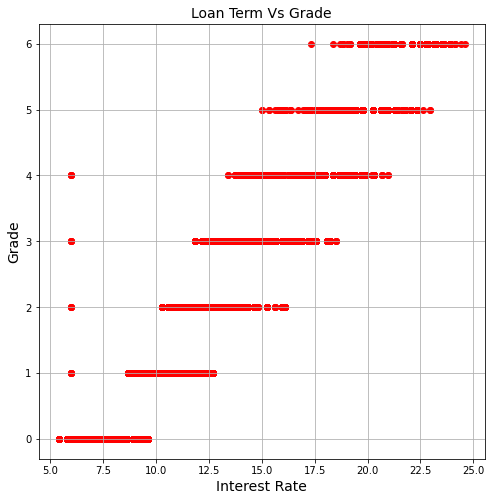

In [34]:
plt.scatter(data['int_rate'], data['grade'], color='red')
plt.title('Loan Term Vs Grade', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Grade', fontsize=14)
plt.grid(True)
plt.show()

# Modelling

In [35]:
# import pandas as pd
# import matplotlib.pyplot as plt

# data1 = {'year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
#         'month': [12,11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
#         'interest_rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
#         'unemployment_rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
#         'index_price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
#         }

# df = pd.DataFrame(data1)

# plt.scatter(df['interest_rate'], df['index_price'], color='red')
# plt.title('Index Price Vs Interest Rate', fontsize=14)
# plt.xlabel('Interest Rate', fontsize=14)
# plt.ylabel('Index Price', fontsize=14)
# plt.grid(True)
# plt.show()

In [36]:
# # drop_col = ['grade','home_ownership','purpose']
# # from sklearn.preprocessing import StandardScaler
# # X = StandardScaler().fit_transform(data.drop(columns=drop_col))
# # y = data['int_rate']
# # from sklearn.model_selection import train_test_split
# # X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
# import pandas as pd
# from sklearn import linear_model
# import statsmodels.api as sm

# data = {'year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
#         'month': [12,11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
#         'interest_rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
#         'unemployment_rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
#         'index_price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
#         }

# df = pd.DataFrame(data)
# x = df[['interest_rate','unemployment_rate']]
# y = df['index_price']
 
# # with sklearn
# regr = linear_model.LinearRegression()
# regr.fit(x, y)

# print('Intercept: \n', regr.intercept_)
# print('Coefficients: \n', regr.coef_)

# # with statsmodels
# x = sm.add_constant(x) # adding a constant
 
# model = sm.OLS(y, x).fit()
# predictions = model.predict(x) 
 
# print_model = model.summary()
# print(print_model)

In [38]:
X = data.drop(columns=drop_col)
y = data['int_rate']

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Multiple Linear Regression

In [40]:
# Function to evaluate regression models
def reg_model(model,x_train,x_test,y_train,y_test,X,y):
    # Defining the model
    reg_model = model
    # Fiting the model on training data
    reg_model.fit(x_train, y_train)
    #Prediction of test set
    y_pred= reg_model.predict(x_test)    
    #Model Evaluation
    meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
    meanSqErr = metrics.mean_squared_error(y_test, y_pred)
    print('R squared: {:.2f}'.format(reg_model.score(X,y)*100))
    print('Mean Absolute Error:', meanAbErr)
    print('Mean Square Error:', meanSqErr)
    # Checking the intercept and Coefficients
    print("Intercept: ", reg_model.intercept_)
    print("Coefficients:")
    print(list(zip(X, reg_model.coef_)))
    #Actual value and the predicted value
    mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
    mlr_diff['residuals'] = mlr_diff['Actual value'] - mlr_diff['Predicted value']
    mlr_diff['no'] = range(1, len(mlr_diff) + 1)    
    #Plotting the first 100 rows for actual value vs predicated value
    
    plt.rcParams['figure.figsize'] = (50,10)
    ax = plt.gca()    # gca stands for 'get current axis'
    mlr_diff1 = mlr_diff[:100]
    mlr_diff1.plot(kind='line',x='no',y='Actual value',ax=ax)
    mlr_diff1.plot(kind='line',x='no',y='Predicted value', color='red', ax=ax)
    plt.show()
    
    # Ploting the actual values vs true vales
    plt.figure(figsize=(5,5))
    plt.scatter(mlr_diff['Actual value'], mlr_diff['Predicted value'], c='crimson')
    plt.yscale('log')
    plt.xscale('log')
    p1 = max(max(mlr_diff['Predicted value']), max(mlr_diff['Actual value']))
    p2 = min(min(mlr_diff['Predicted value']), min(mlr_diff['Actual value']))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=5)
    plt.ylabel('Predictions', fontsize=5)
    plt.axis('equal')
    plt.show()
    #Ploting the residuals
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.scatterplot(data=mlr_diff, x="Predicted value", y="residuals")
    plt.axhline(y=0)

R squared: 90.39
Mean Absolute Error: 0.9119424308507013
Mean Square Error: 1.3577504275701633
Intercept:  6.996840366866826
Coefficients:
[('loan_amnt', 1.4640782388153198e-05), ('term', 0.01745765944366301), ('grade', 2.4614117883071502), ('annual_inc', -1.745036679254297e-07), ('home_ownership_1', 0.12583101954091322), ('home_ownership_2', -1.0886644694007312), ('home_ownership_3', 0.4175685211905779), ('home_ownership_4', 0.2520846748435578), ('home_ownership_5', 0.2931802538256808), ('purpose_1', -0.1709918697433326), ('purpose_2', 0.08963257352080667), ('purpose_3', 0.0743477847784747), ('purpose_4', 0.1460531162607303), ('purpose_5', -0.011804378592742991), ('purpose_6', -0.02728535030636186), ('purpose_7', -0.14282477108940161), ('purpose_8', -0.07968041442596506), ('purpose_9', 0.12300934815305546), ('purpose_10', 0.14135331760411585), ('purpose_11', -0.024067908388385753), ('purpose_12', -0.06436384240471141), ('purpose_13', -0.08778544879443759), ('purpose_14', 0.03440784342

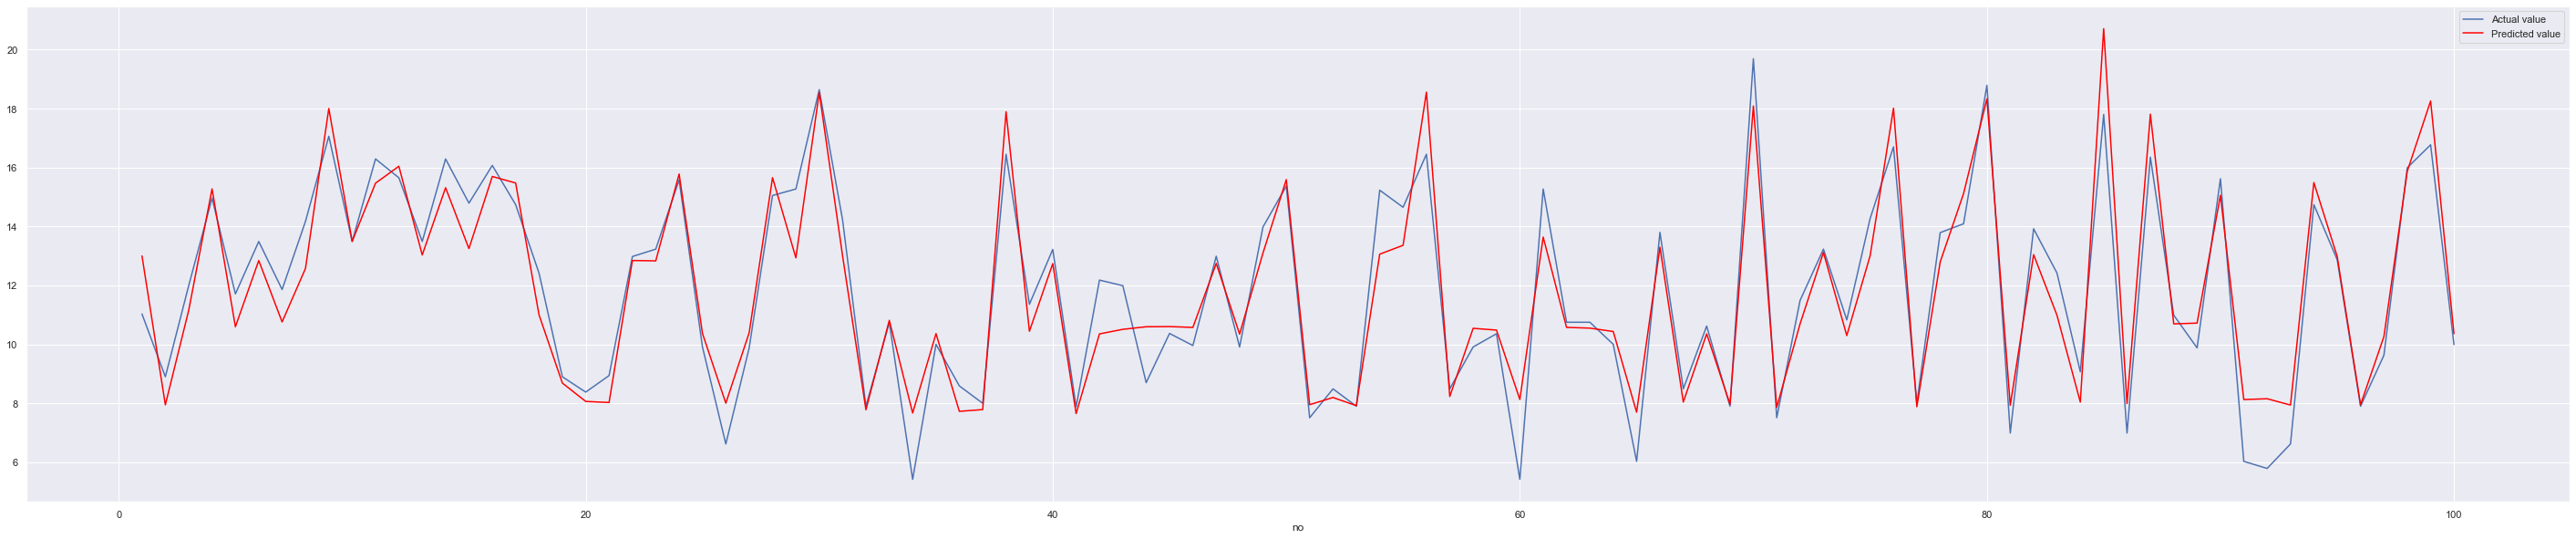

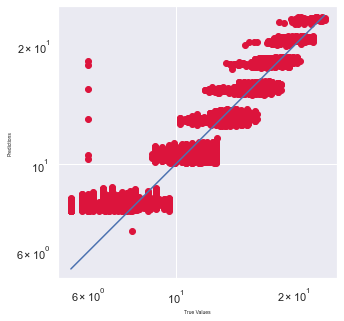

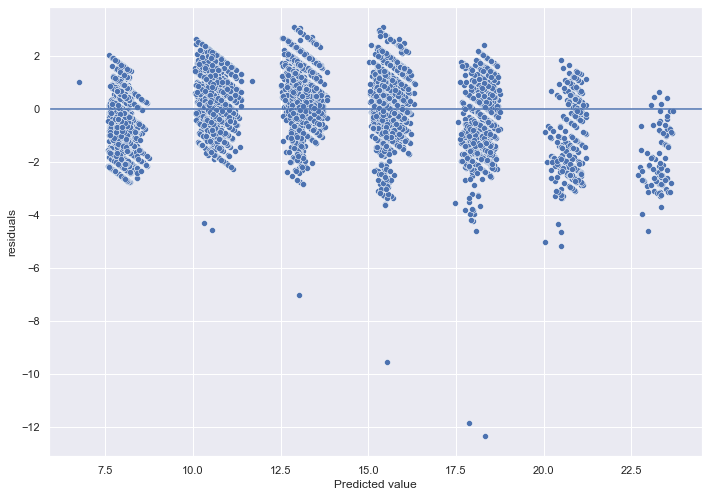

In [45]:
reg_model(LinearRegression(),x_train,x_test,y_train,y_test,X,y)

In [47]:
LinearRegression().get_params(deep=True)

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

R squared: 90.28
Mean Absolute Error: 0.9168808481974261
Mean Square Error: 1.3738984005333048
Intercept:  7.330894267690591
Coefficients:
[('loan_amnt', 1.46396716372195e-05), ('grade', 2.4747481784959535), ('term', 0.015752544739247788), ('annual_inc', -5.176633348646931e-07)]


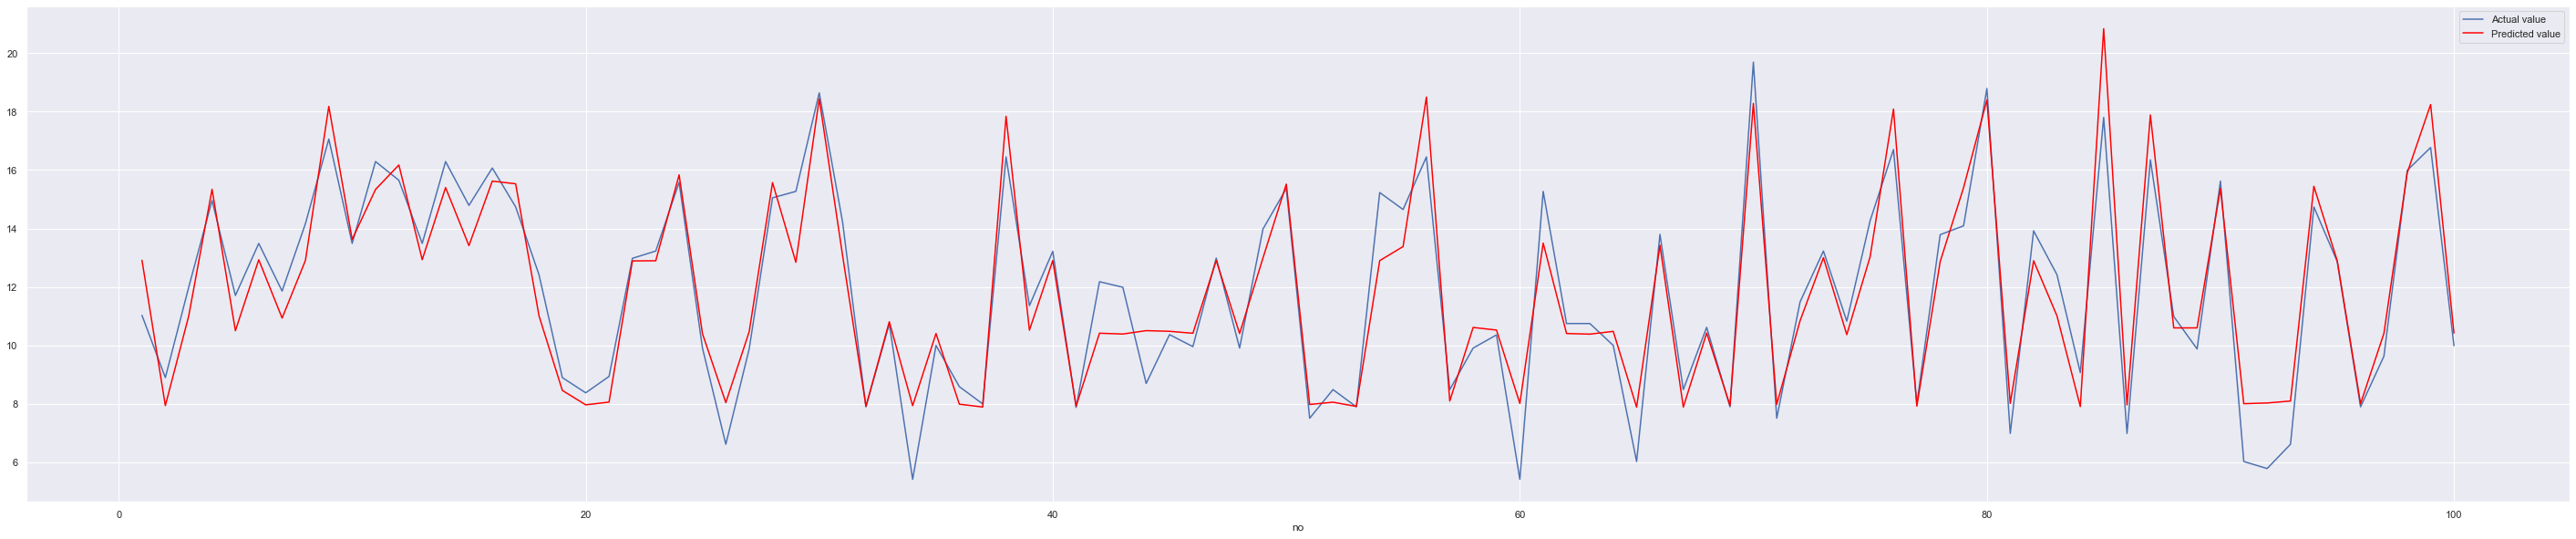

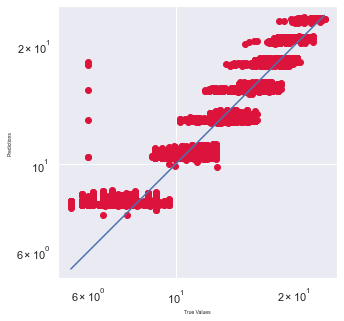

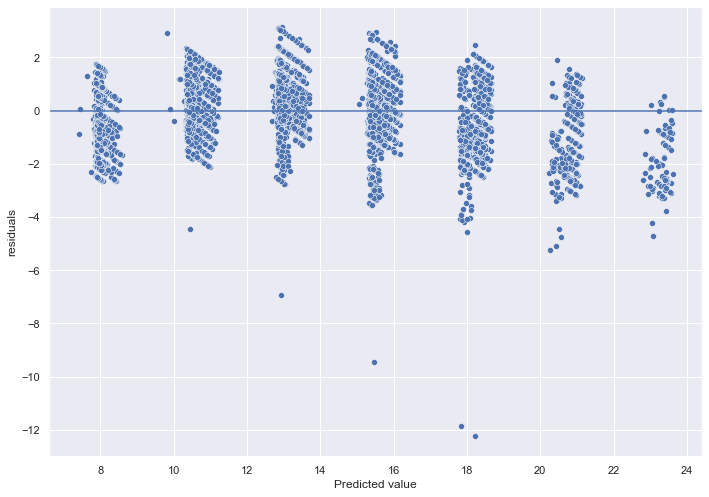

In [42]:
data1 = data[["loan_amnt","grade","term","annual_inc"]]
X1 = data1
y1 = data['int_rate']
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3, random_state = 42)

reg_model(LinearRegression(),x_train1,x_test1,y_train1,y_test1,X1,y1)

In [215]:
# from sklearn.model_selection import cross_val_score
# # function to get cross validation scores
# def get_cv_scores(model):
#     scores = cross_val_score(model,
#                              x_train,
#                              y_train,
#                              cv=5,
#                              scoring='r2')
    
#     print('CV Mean: ', np.mean(scores))
#     print('STD: ', np.std(scores))
#     print('\n')

In [217]:
# from sklearn.linear_model import LinearRegression
# # Train model
# lr = LinearRegression().fit(x_train, y_train)
# # get cross val scores
# get_cv_scores(lr)

CV Mean:  0.9032035536381441
STD:  0.0017757847137198084




#### Ridge

R squared: 90.39
Mean Absolute Error: 0.911912944016995
Mean Square Error: 1.3576946384435655
Intercept:  7.073675677602237
Coefficients:
[('loan_amnt', 1.464653490622648e-05), ('term', 0.01745963503365609), ('grade', 2.4613586376511707), ('annual_inc', -1.7507854832691795e-07), ('home_ownership_1', 0.04897532815223108), ('home_ownership_2', -0.7767740467815641), ('home_ownership_3', 0.3362842826525348), ('home_ownership_4', 0.17516452985160727), ('home_ownership_5', 0.21634990606026638), ('purpose_1', -0.17084828395083537), ('purpose_2', 0.08959851413032585), ('purpose_3', 0.07433739988210819), ('purpose_4', 0.14547865371143065), ('purpose_5', -0.01179430447794574), ('purpose_6', -0.0271842095178298), ('purpose_7', -0.14272043943846605), ('purpose_8', -0.07949158352686302), ('purpose_9', 0.12270874062042035), ('purpose_10', 0.14104031534219538), ('purpose_11', -0.023722826178146472), ('purpose_12', -0.06428527088155918), ('purpose_13', -0.08746168590568201), ('purpose_14', 0.034344980

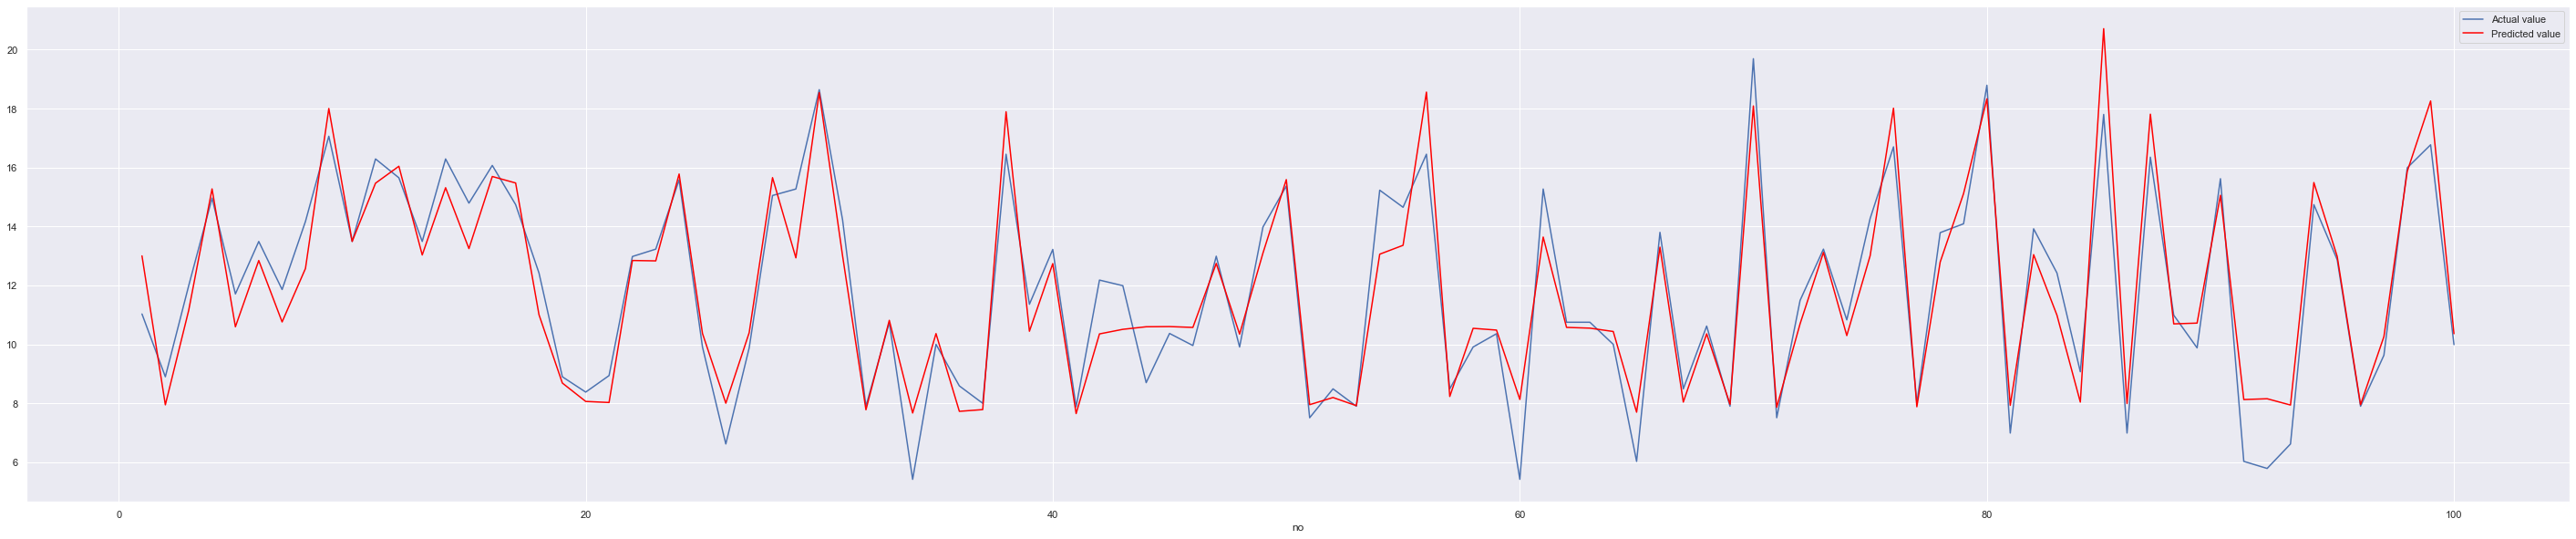

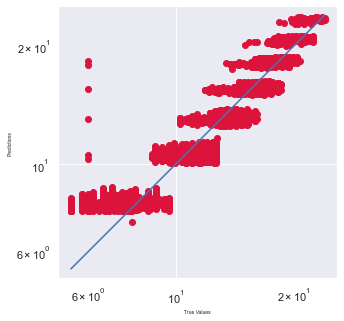

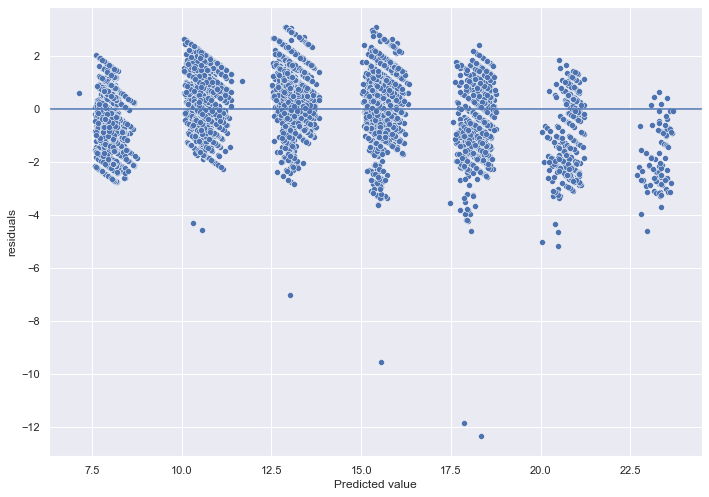

In [48]:
reg_model(Ridge(alpha=1),x_train,x_test,y_train,y_test,X,y)

In [49]:
Ridge().get_params(deep=True)

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [51]:
# find optimal alpha with grid search
ridge = Ridge(alpha=1)
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver = ["auto","svd","cholesky","lsqr","sparse_cg","sag","saga"]
param_grid = dict(alpha=alpha,solver=solver)
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
Best Score:  0.9039148450616696
Best Params:  {'alpha': 100, 'solver': 'auto'}


R squared: 90.39
Mean Absolute Error: 0.9123382819898112
Mean Square Error: 1.3576356243350873
Intercept:  7.235171612945833
Coefficients:
[('loan_amnt', 1.4861513847063585e-05), ('term', 0.017676256582691164), ('grade', 2.4557873134081976), ('annual_inc', -1.7925895568327895e-07), ('home_ownership_1', -0.11507248406656459), ('home_ownership_2', -0.025952757623687022), ('home_ownership_3', 0.07678410388116234), ('home_ownership_4', 0.010337136088994099), ('home_ownership_5', 0.05390400171921569), ('purpose_1', -0.1592055556648439), ('purpose_2', 0.086215204567631), ('purpose_3', 0.07367353456637399), ('purpose_4', 0.1028054779038764), ('purpose_5', -0.012476131493030559), ('purpose_6', -0.02015045444207405), ('purpose_7', -0.13524924223092044), ('purpose_8', -0.06579417377160132), ('purpose_9', 0.09861171784505186), ('purpose_10', 0.1354758135223455), ('purpose_11', -0.010107069740603856), ('purpose_12', -0.05806092745780691), ('purpose_13', -0.064896515566285), ('purpose_14', 0.029158

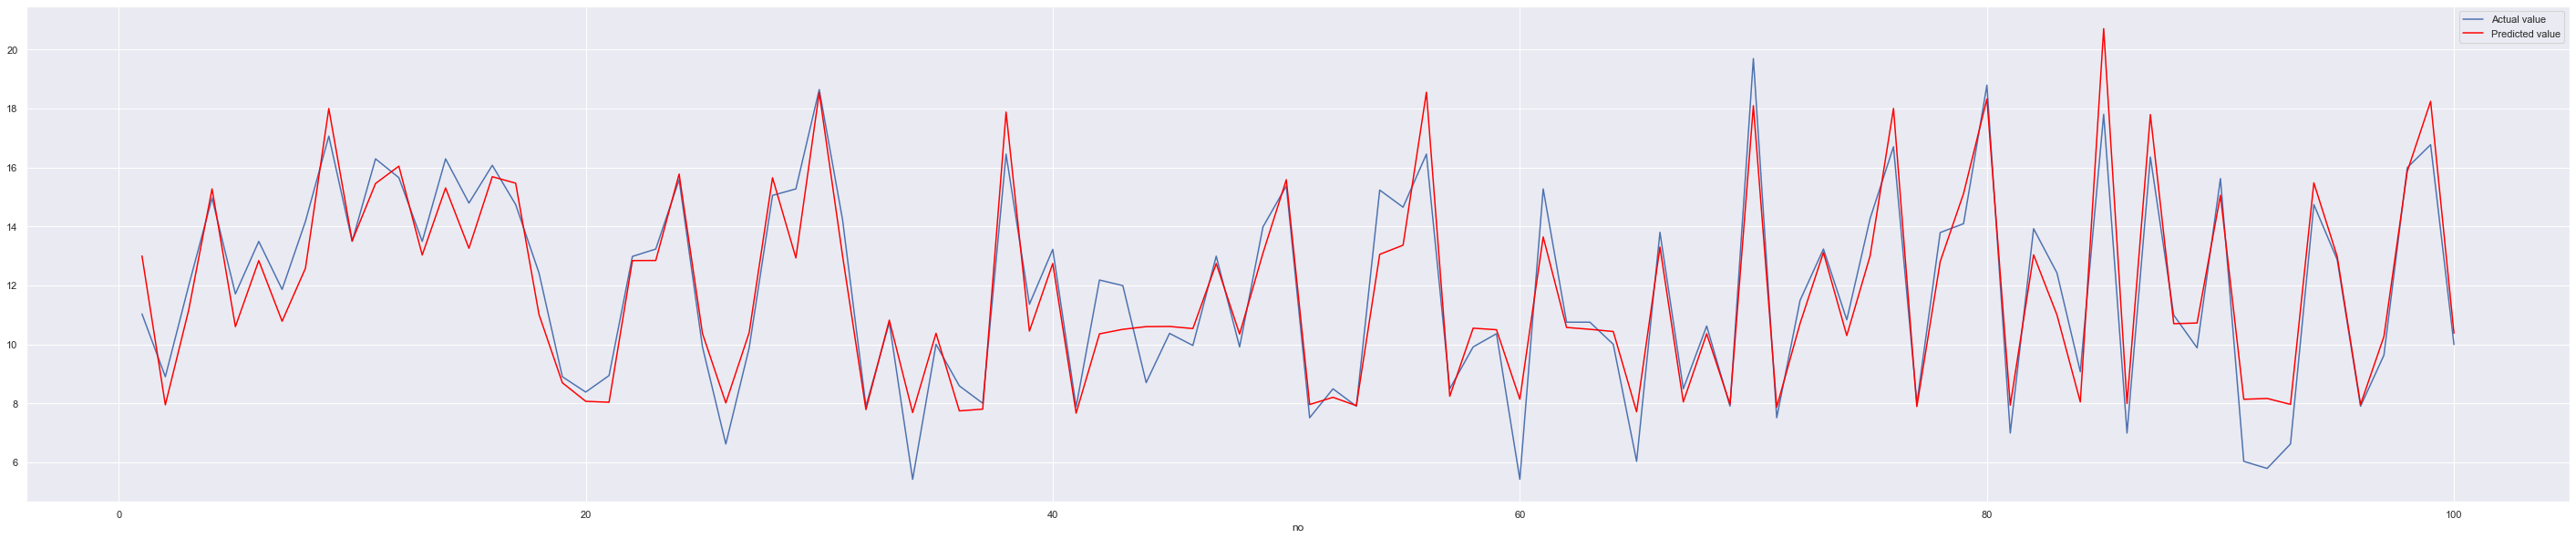

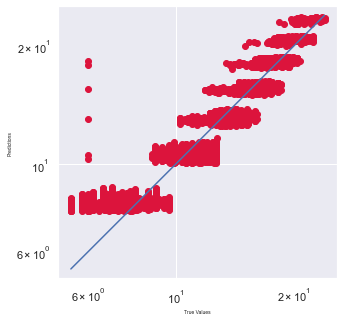

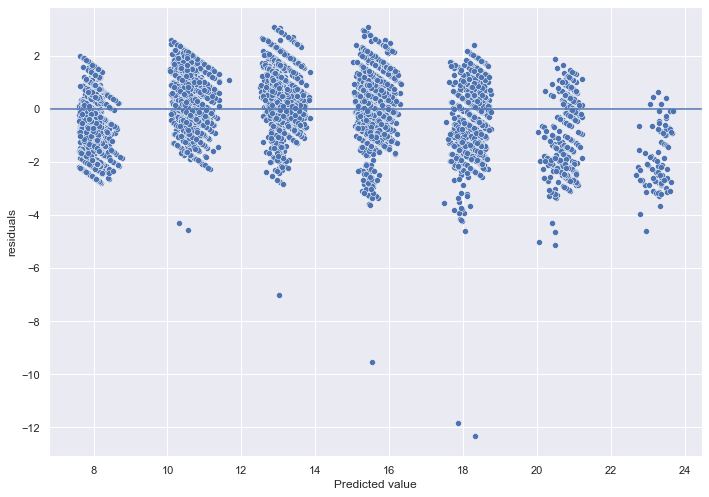

In [68]:
reg_model(Ridge(alpha=100),x_train,x_test,y_train,y_test,X,y)

#### Lasso

R squared: 85.94
Mean Absolute Error: 1.1197930121564088
Mean Square Error: 1.977286649483144
Intercept:  7.215214829893668
Coefficients:
[('loan_amnt', 3.786021675786839e-05), ('term', 0.03591841523376157), ('grade', 1.8508690181441922), ('annual_inc', -7.611050276780068e-07), ('home_ownership_1', -0.0), ('home_ownership_2', -0.0), ('home_ownership_3', 0.0), ('home_ownership_4', -0.0), ('home_ownership_5', 0.0), ('purpose_1', -0.0), ('purpose_2', -0.0), ('purpose_3', 0.0), ('purpose_4', 0.0), ('purpose_5', -0.0), ('purpose_6', -0.0), ('purpose_7', -0.0), ('purpose_8', -0.0), ('purpose_9', 0.0), ('purpose_10', 0.0), ('purpose_11', -0.0), ('purpose_12', 0.0), ('purpose_13', -0.0), ('purpose_14', 0.0)]


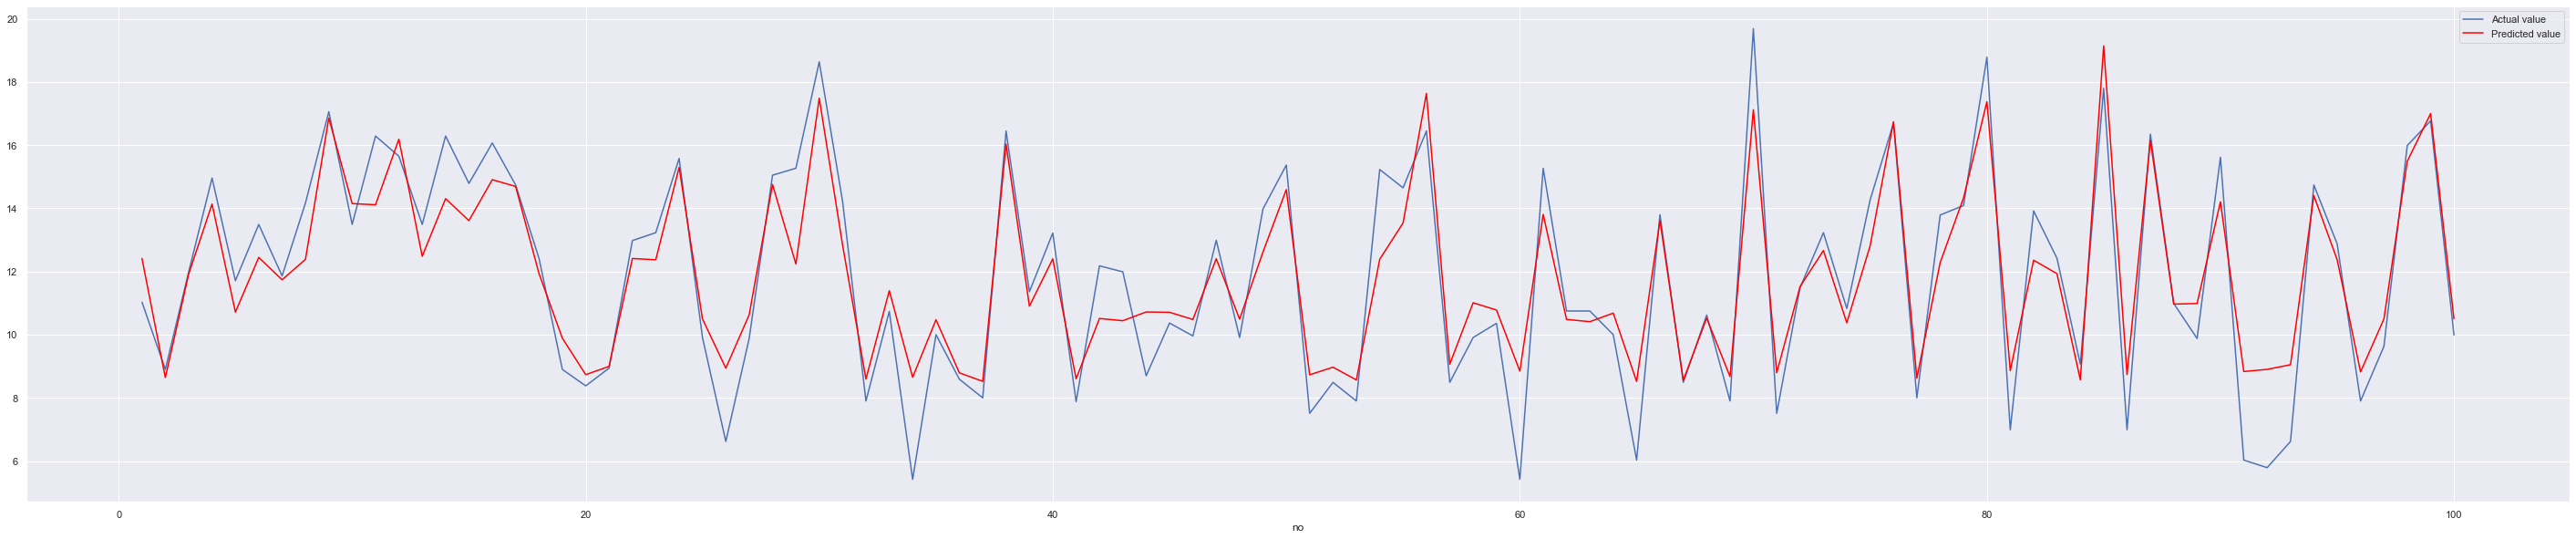

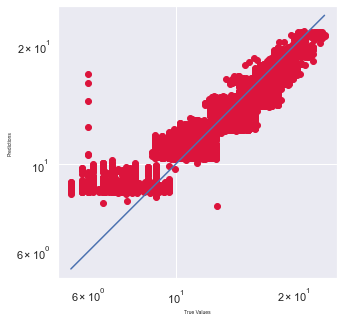

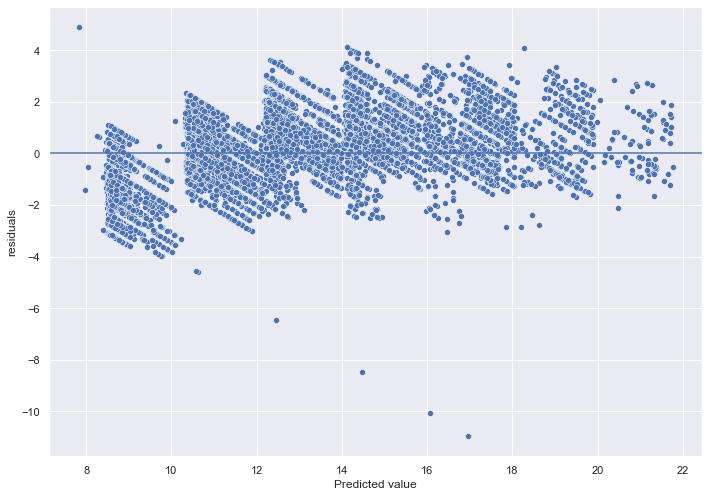

In [52]:
reg_model(Lasso(),x_train,x_test,y_train,y_test,X,y)

In [53]:
Lasso().get_params(deep=True)

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [54]:
# find optimal alpha with grid search
lasso = Lasso()
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
selection = ["cyclic","random"]
param_grid = dict(alpha=alpha,selection=selection)
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best Score:  0.903906185716625
Best Params:  {'alpha': 0.001, 'selection': 'cyclic'}


R squared: 90.39
Mean Absolute Error: 0.9119733149036547
Mean Square Error: 1.3578871022080024
Intercept:  7.255663411661892
Coefficients:
[('loan_amnt', 1.4778148394693311e-05), ('term', 0.017297457518504752), ('grade', 2.461572882448951), ('annual_inc', -1.922215661969746e-07), ('home_ownership_1', -0.1284395338152827), ('home_ownership_2', -0.0), ('home_ownership_3', 0.0), ('home_ownership_4', -0.0), ('home_ownership_5', 0.03848548738246723), ('purpose_1', -0.1431183489326178), ('purpose_2', 0.08378747914712549), ('purpose_3', 0.07420015960982011), ('purpose_4', 0.02864066460164533), ('purpose_5', -0.0), ('purpose_6', -0.0), ('purpose_7', -0.12230648767612447), ('purpose_8', -0.018257566413692656), ('purpose_9', 0.05876548982727205), ('purpose_10', 0.1329094207380598), ('purpose_11', -0.0), ('purpose_12', -0.03976559324102841), ('purpose_13', -0.0), ('purpose_14', 0.0)]


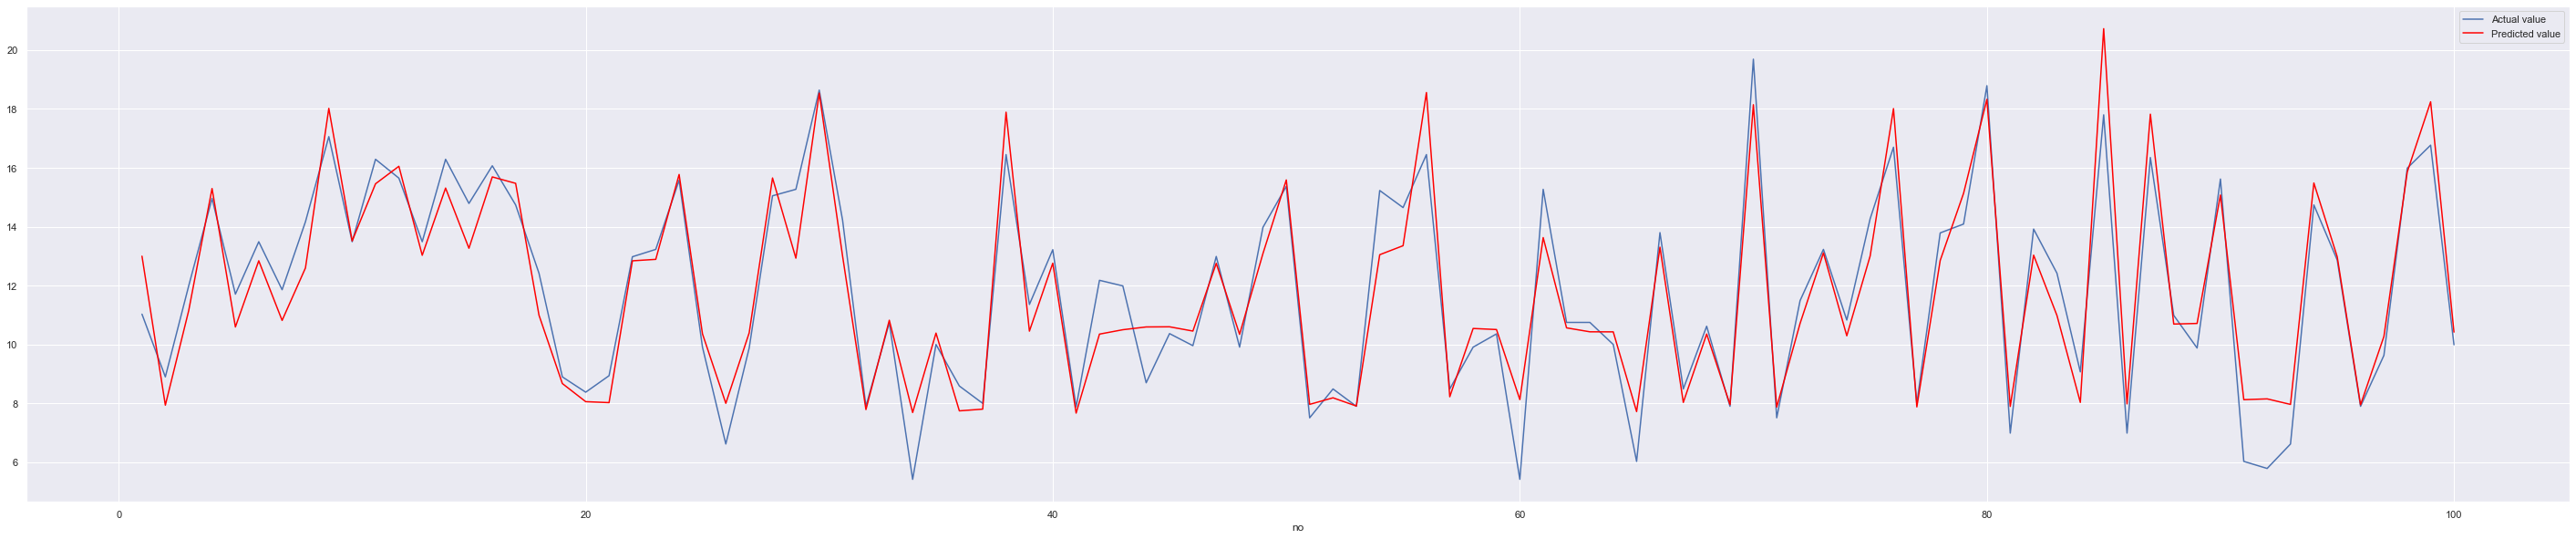

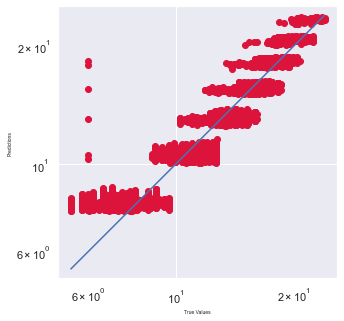

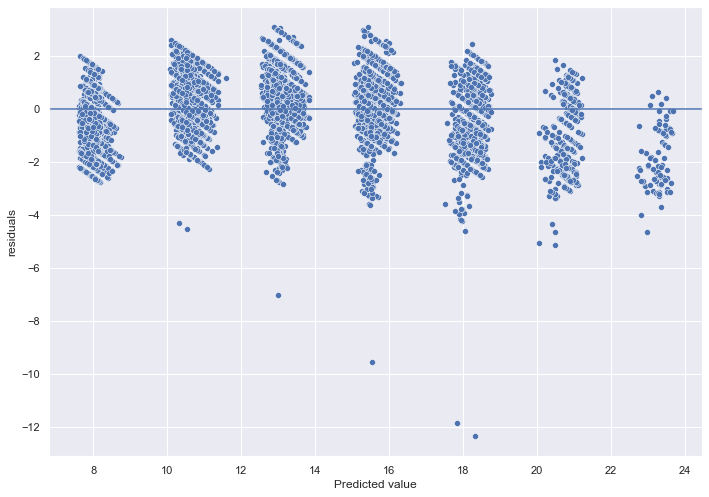

In [56]:
reg_model(Lasso(alpha=0.001),x_train,x_test,y_train,y_test,X,y)

### Elastic Net

R squared: 82.42
Mean Absolute Error: 1.2678917492945434
Mean Square Error: 2.4675855247384972
Intercept:  6.861796105645892
Coefficients:
[('loan_amnt', 4.1616048404714925e-05), ('term', 0.051469629283568616), ('grade', 1.6294020776783698), ('annual_inc', -7.582078696479246e-07), ('home_ownership_1', -0.0), ('home_ownership_2', -0.0), ('home_ownership_3', 0.0), ('home_ownership_4', -0.0), ('home_ownership_5', 0.0), ('purpose_1', -0.0), ('purpose_2', -0.0), ('purpose_3', 0.0), ('purpose_4', 0.0), ('purpose_5', -0.0), ('purpose_6', -0.0), ('purpose_7', -0.0), ('purpose_8', -0.0), ('purpose_9', 0.0), ('purpose_10', 0.0), ('purpose_11', -0.0), ('purpose_12', 0.0), ('purpose_13', -0.0), ('purpose_14', 0.0)]


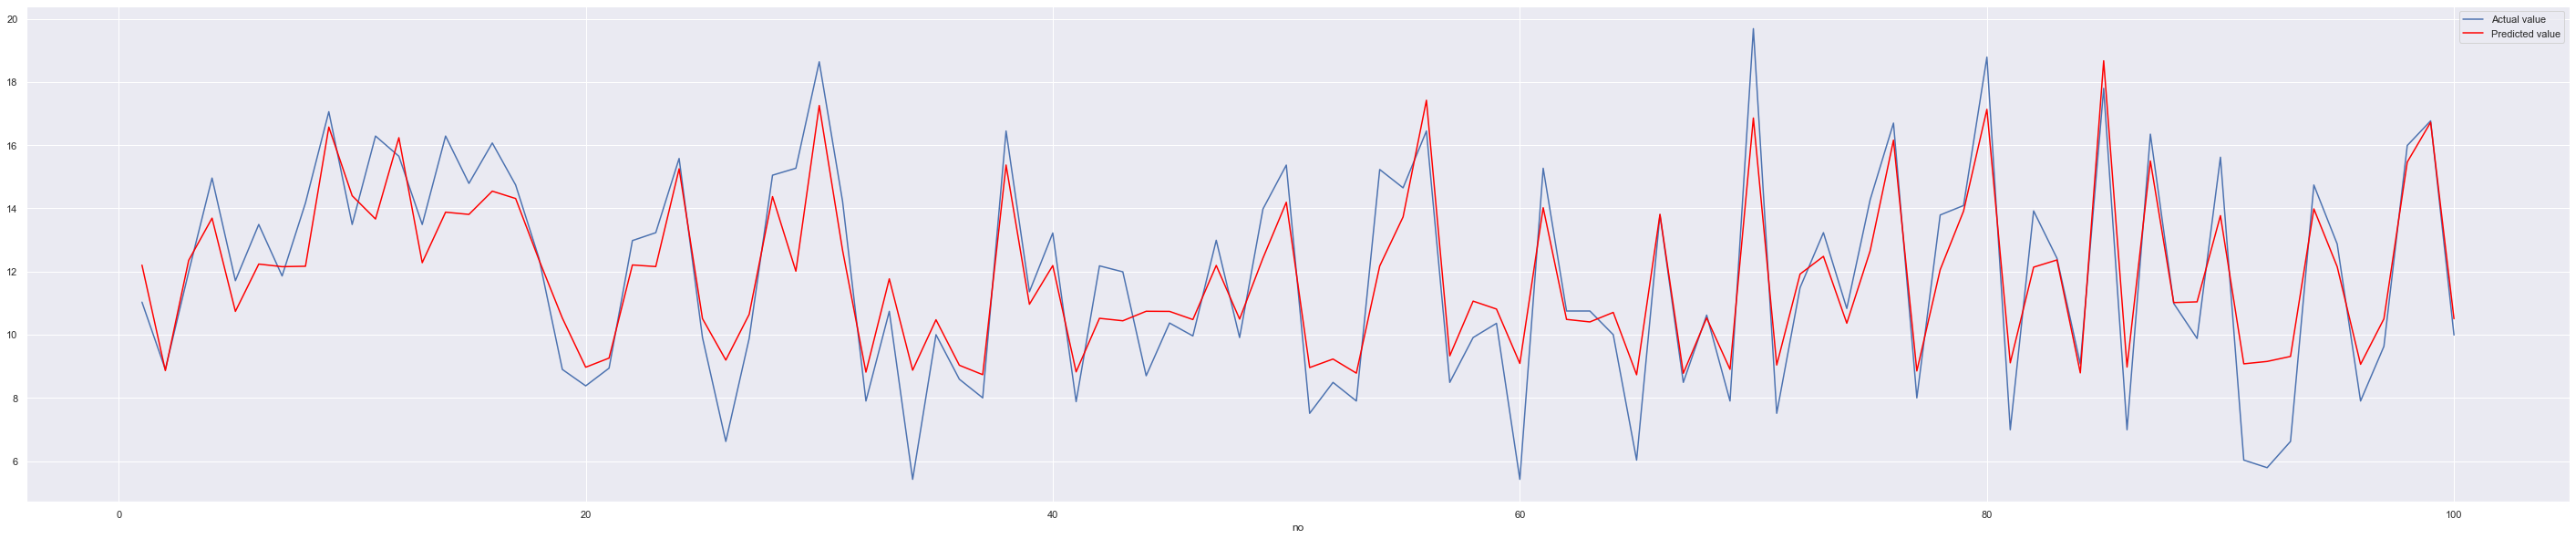

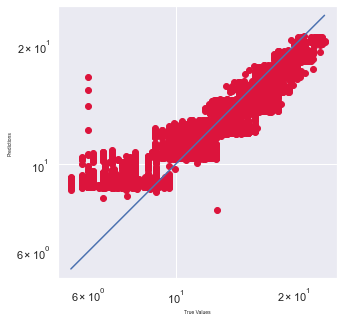

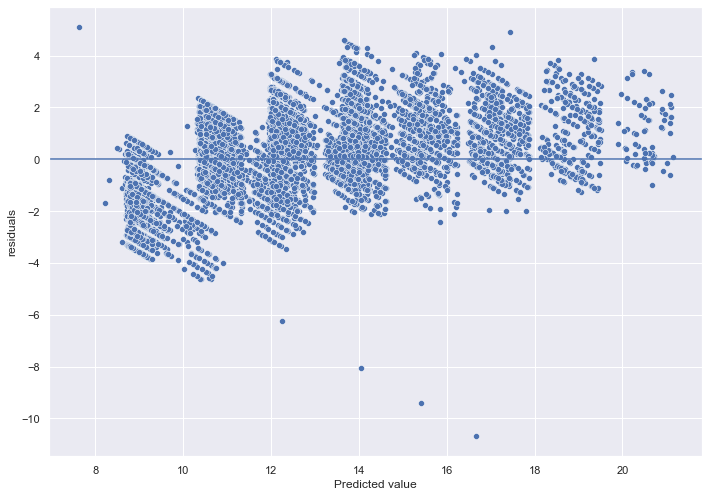

In [59]:
reg_model(ElasticNet(),x_train,x_test,y_train,y_test,X,y)

In [60]:
ElasticNet().get_params(deep=True)

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [62]:
# find optimal alpha with grid search
elastic_net = ElasticNet()
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
selection = ["cyclic","random"]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio,selection=selection)
grid = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 154 candidates, totalling 770 fits
Best Score:  0.9039127446710482
Best Params:  {'alpha': 0.001, 'l1_ratio': 0.2, 'selection': 'cyclic'}


R squared: 90.39
Mean Absolute Error: 0.9119733149036547
Mean Square Error: 1.3578871022080024
Intercept:  7.255663411661892
Coefficients:
[('loan_amnt', 1.4778148394693311e-05), ('term', 0.017297457518504752), ('grade', 2.461572882448951), ('annual_inc', -1.922215661969746e-07), ('home_ownership_1', -0.1284395338152827), ('home_ownership_2', -0.0), ('home_ownership_3', 0.0), ('home_ownership_4', -0.0), ('home_ownership_5', 0.03848548738246723), ('purpose_1', -0.1431183489326178), ('purpose_2', 0.08378747914712549), ('purpose_3', 0.07420015960982011), ('purpose_4', 0.02864066460164533), ('purpose_5', -0.0), ('purpose_6', -0.0), ('purpose_7', -0.12230648767612447), ('purpose_8', -0.018257566413692656), ('purpose_9', 0.05876548982727205), ('purpose_10', 0.1329094207380598), ('purpose_11', -0.0), ('purpose_12', -0.03976559324102841), ('purpose_13', -0.0), ('purpose_14', 0.0)]


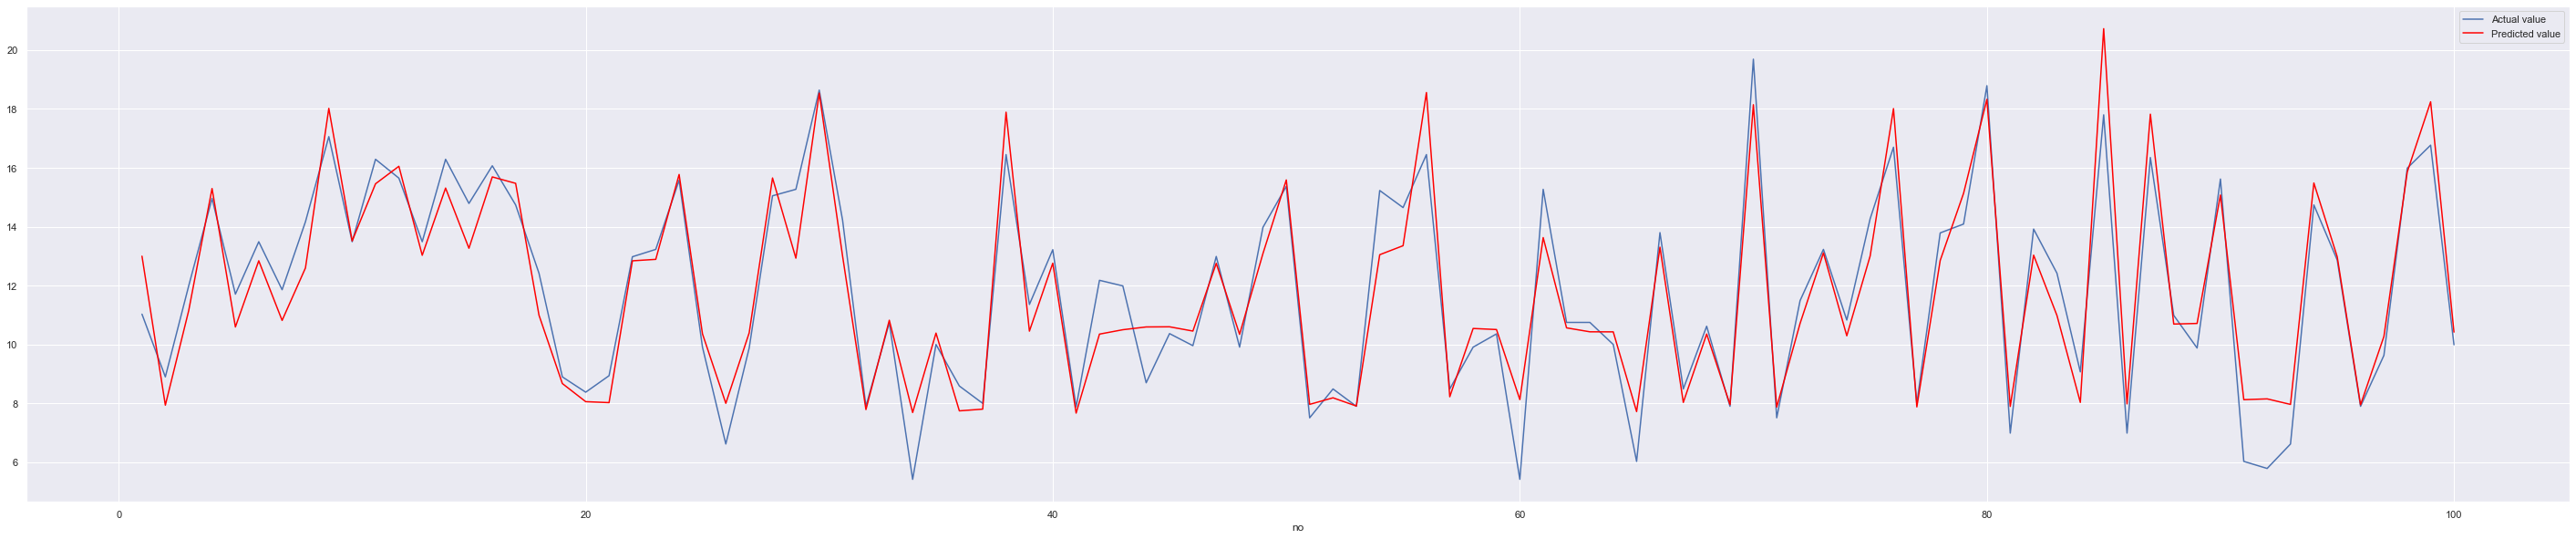

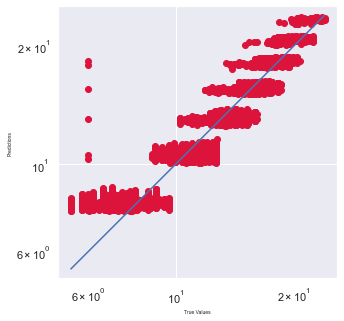

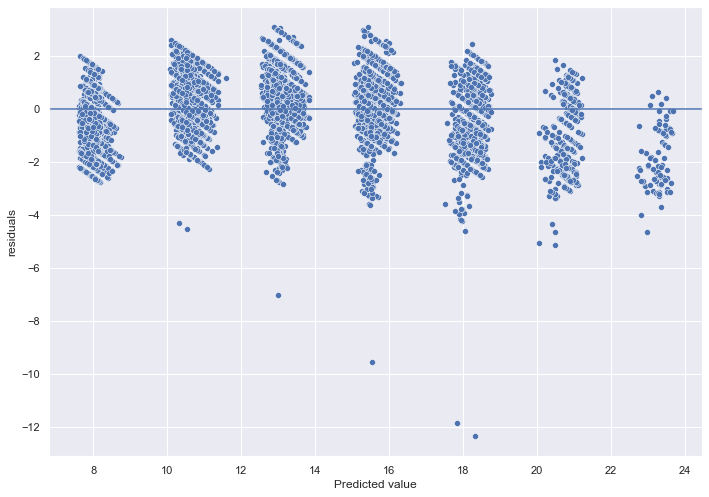

In [63]:
reg_model(ElasticNet(alpha=0.001,l1_ratio=1,selection="cyclic"),x_train,x_test,y_train,y_test,X,y)

### Random Forest Regressor

In [67]:
# Function to evaluate regression models
def model(model,x_train,x_test,y_train,y_test,X,y):
    # Defining the model
    reg_model = model
    # Fiting the model on training data
    reg_model.fit(x_train, y_train)
    #Prediction of test set
    y_pred= reg_model.predict(x_test)    
    #Model Evaluation
    meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
    meanSqErr = metrics.mean_squared_error(y_test, y_pred)
    print('R squared: {:.2f}'.format(reg_model.score(X,y)*100))
    print('Mean Absolute Error:', meanAbErr)
    print('Mean Square Error:', meanSqErr)
    # Checking the intercept and Coefficients
    #Actual value and the predicted value
    mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
    mlr_diff['residuals'] = mlr_diff['Actual value'] - mlr_diff['Predicted value']
    mlr_diff['no'] = range(1, len(mlr_diff) + 1)    
    #Plotting the first 100 rows for actual value vs predicated value
    
    plt.rcParams['figure.figsize'] = (50,10)
    ax = plt.gca()    # gca stands for 'get current axis'
    mlr_diff1 = mlr_diff[:100]
    mlr_diff1.plot(kind='line',x='no',y='Actual value',ax=ax)
    mlr_diff1.plot(kind='line',x='no',y='Predicted value', color='red', ax=ax)
    plt.show()
    
    # Ploting the actual values vs true vales
    plt.figure(figsize=(5,5))
    plt.scatter(mlr_diff['Actual value'], mlr_diff['Predicted value'], c='crimson')
    plt.yscale('log')
    plt.xscale('log')
    p1 = max(max(mlr_diff['Predicted value']), max(mlr_diff['Actual value']))
    p2 = min(min(mlr_diff['Predicted value']), min(mlr_diff['Actual value']))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=5)
    plt.ylabel('Predictions', fontsize=5)
    plt.axis('equal')
    plt.show()
    #Ploting the residuals
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.scatterplot(data=mlr_diff, x="Predicted value", y="residuals")
    plt.axhline(y=0)

R squared: 96.39
Mean Absolute Error: 0.8566859289214873
Mean Square Error: 1.1958137455568438


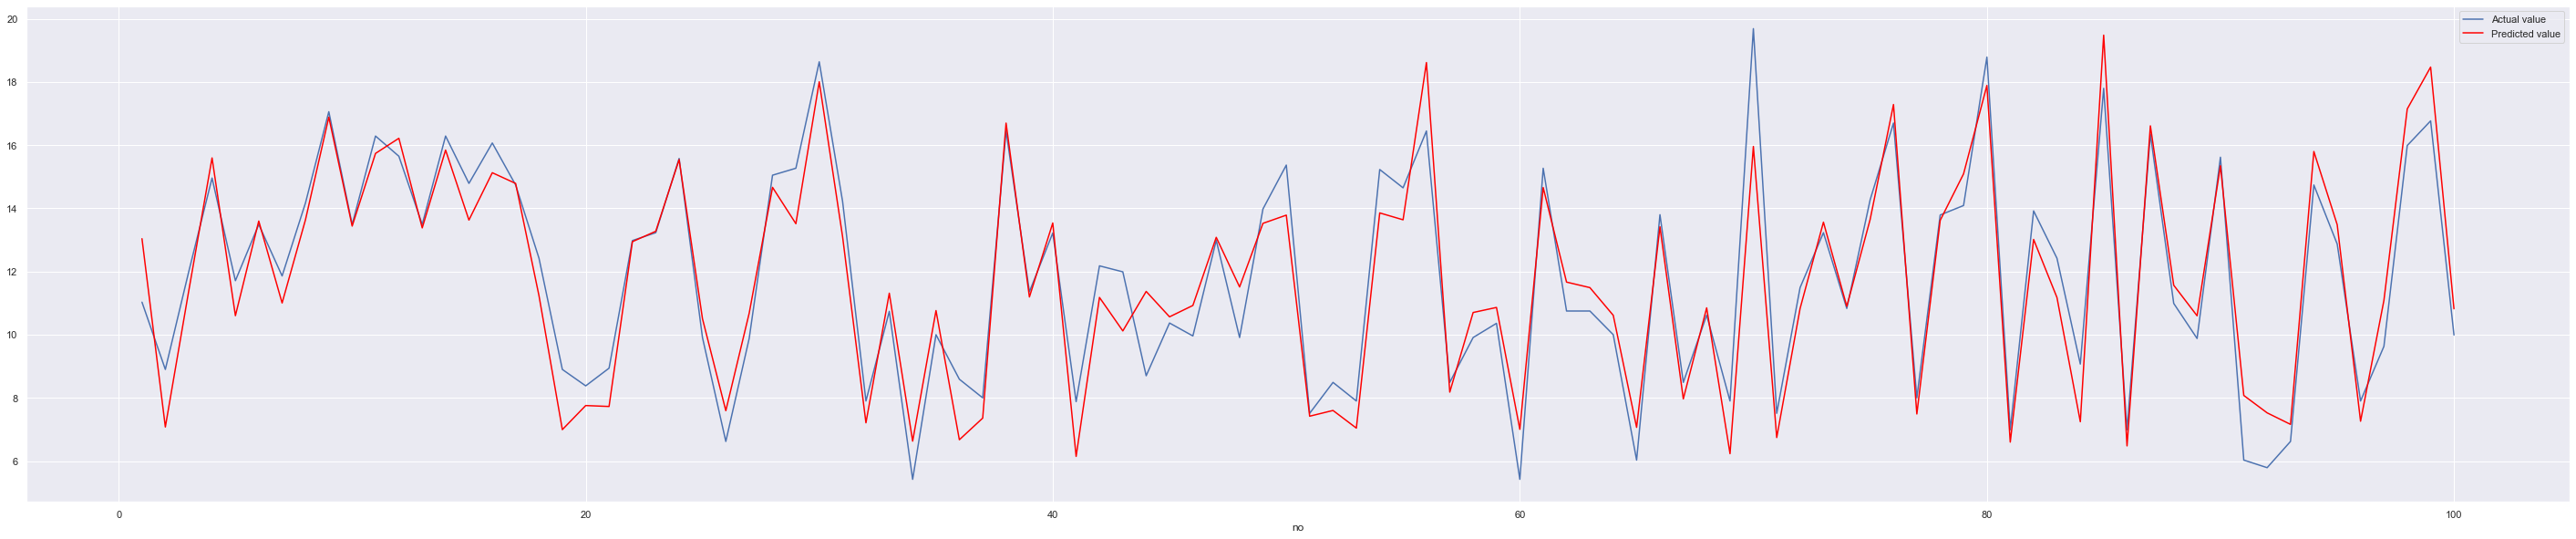

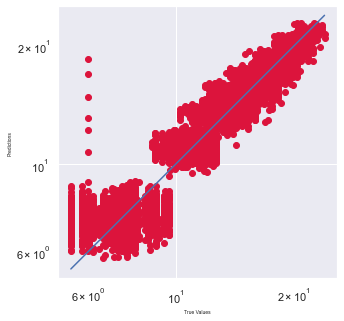

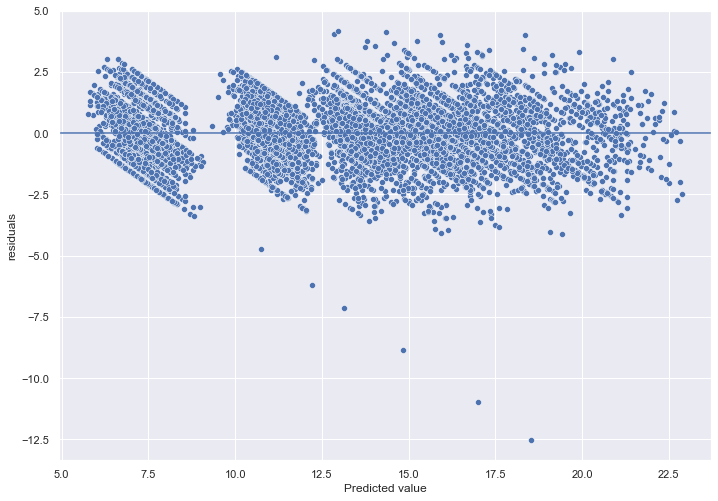

In [70]:
model(RandomForestRegressor(),x_train,x_test,y_train,y_test,X,y)

In [72]:
RandomForestRegressor().get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# find optimal alpha with grid search
regressor = RandomForestRegressor()
n_estimators = [10,50,100]
criterion = ["squared_error","absolute_error","friedman_mse","poisson"]
max_depth = [5,10,100,None]
max_features = ["sqrt","log2",None]
param_grid = dict(n_estimators=n_estimators, criterion=criterion,max_depth=max_depth,max_features=max_features)
grid = GridSearchCV(estimator=regressor, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [ ]:
model(RandomForestRegressor(),x_train,x_test,y_train,y_test,X,y)

In [45]:
# random forest regressor
# Fitting Random Forest Regression to the dataset
# import the regressor

  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
ranfor = regressor.fit(x_train, y_train)
# Y_pred = regressor.predict(np.array([6.5]).reshape(1, 1))  # test the output by changing values
# from sklearn.linear_model import Lasso
# # Train model with default alpha=1
# lasso = Lasso(alpha=1).fit(x_train, y_train)
# get cross val scores
get_cv_scores(ranfor)


CV Mean:  0.9157992315490248
STD:  0.003189066364506331




In [65]:
# random forest regressor
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.tree import DecisionTreeRegressor
  
 # create regressor object
regressor = DecisionTreeRegressor(random_state=0)
  
# fit the regressor with x and y data
dectree = regressor.fit(x_train, y_train)
y_pred_dectree= regressor.predict(x_test)
# print("Intercept: ", regressor.intercept_)
# print("Coefficients:")
# list(zip(X, regressor.coef_))
#Model Evaluation
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_dectree)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_dectree)
print('R squared: {:.2f}'.format(dectree.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
# Y_pred = regressor.predict(np.array([6.5]).reshape(1, 1))  # test the output by changing values
# from sklearn.linear_model import Lasso
# # Train model with default alpha=1
# lasso = Lasso(alpha=1).fit(x_train, y_train)
# get cross val scores
# get_cv_scores(dectree)

R squared: 95.45
Mean Absolute Error: 1.0996812932051931
Mean Square Error: 1.9736115712007531


In [47]:
from sklearn.neighbors import KNeighborsRegressor
# fit the regressor with x and y data
neigh = KNeighborsRegressor(n_neighbors=2)
knn = neigh.fit(x_train, y_train)
# Y_pred = regressor.predict(np.array([6.5]).reshape(1, 1))  # test the output by changing values
# from sklearn.linear_model import Lasso
# # Train model with default alpha=1
# lasso = Lasso(alpha=1).fit(x_train, y_train)
# get cross val scores
get_cv_scores(knn)

CV Mean:  -0.04413604591669262
STD:  0.025841704917607407




In [48]:
knn.get_params(deep=True)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}

In [264]:
from sklearn.svm import SVR
# fit the regressor with x and y data
regr = SVR()
svr = regr.fit(x_train, y_train)
# Y_pred = regressor.predict(np.array([6.5]).reshape(1, 1))  # test the output by changing values
# from sklearn.linear_model import Lasso
# # Train model with default alpha=1
# lasso = Lasso(alpha=1).fit(x_train, y_train)
# get cross val scores

y_pred_svr= svr.predict(x_test)
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_svr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_svr)
print('R squared: {:.2f}'.format(svr.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)

R squared: 10.23
Mean Absolute Error: 2.9296637485650474
Mean Square Error: 12.593077806565207


In [58]:
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
# # fit the regressor with x and y data
# kernel = DotProduct() + WhiteKernel()
# gpr = GaussianProcessRegressor(kernel=kernel,random_state=0).fit(x_train, y_train)
# # Y_pred = regressor.predict(np.array([6.5]).reshape(1, 1))  # test the output by changing values
# # from sklearn.linear_model import Lasso
# # # Train model with default alpha=1
# # lasso = Lasso(alpha=1).fit(x_train, y_train)
# # get cross val scores
# get_cv_scores(gpr)

In [45]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [48]:
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from keras.optimizers import Adam

# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
349/349 [==============================] - 2s 4ms/step - loss: 6.4849 - mean_squared_logarithmic_error: 6.4826 - val_loss: 6.4717 - val_mean_squared_logarithmic_error: 6.4807
Epoch 2/10
349/349 [==============================] - 1s 3ms/step - loss: 6.4551 - mean_squared_logarithmic_error: 6.4545 - val_loss: 6.4717 - val_mean_squared_logarithmic_error: 6.4807
Epoch 3/10
349/349 [==============================] - 1s 3ms/step - loss: 6.4551 - mean_squared_logarithmic_error: 6.4539 - val_loss: 6.4717 - val_mean_squared_logarithmic_error: 6.4807
Epoch 4/10
349/349 [==============================] - 1s 3ms/step - loss: 6.4551 - mean_squared_logarithmic_error: 6.4551 - val_loss: 6.4717 - val_mean_squared_logarithmic_error: 6.4807
Epoch 5/10
349/349 [==============================] - 1s 3ms/step - loss: 6.4551 - mean_squared_logarithmic_error: 6.4556 - val_loss: 6.4717 - val_mean_squared_logarithmic_error: 6.4807
Epoch 6/10
349/349 [==============================] - 1s 3ms/step - lo

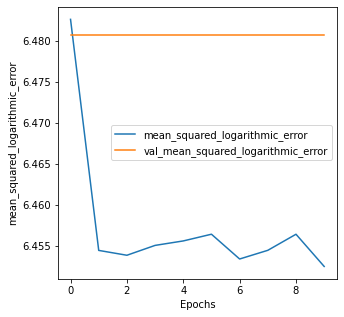

In [49]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [50]:
x_test['prediction'] = model.predict(x_test)

373/373 [==============================] - 1s 1ms/step
